In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

In [36]:
csv_name = 'alzheimers_prediction_dataset.csv'
df = pd.read_csv(csv_name)

# Remover a coluna Country (não é relevante para o diagnóstico de Alzheimer)
if 'Country' in df.columns:
    df = df.drop(columns=['Country'])

# Identificar colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Alzheimer’s Diagnosis')  # Remover a coluna alvo se for categórica

# Aplicar Label Encoding para a coluna alvo
encoder = LabelEncoder()
df['Alzheimer’s Diagnosis'] = encoder.fit_transform(df['Alzheimer’s Diagnosis'])


In [37]:
# Aplicar OneHot Encoding para as colunas categóricas nominais
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

alzheimers_positive = df[df['Alzheimer’s Diagnosis'] == 1]
alzheimers_negative = df[df['Alzheimer’s Diagnosis'] == 0]

# Calcular médias dos atributos para ambos os grupos
mean_positive = alzheimers_positive.mean()
mean_negative = alzheimers_negative.mean()

In [38]:
# Calcular diferença percentual entre os grupos
diff_percentage = ((mean_positive - mean_negative) / mean_negative) * 100
diff_percentage = diff_percentage.drop(labels=['Alzheimer’s Diagnosis'])

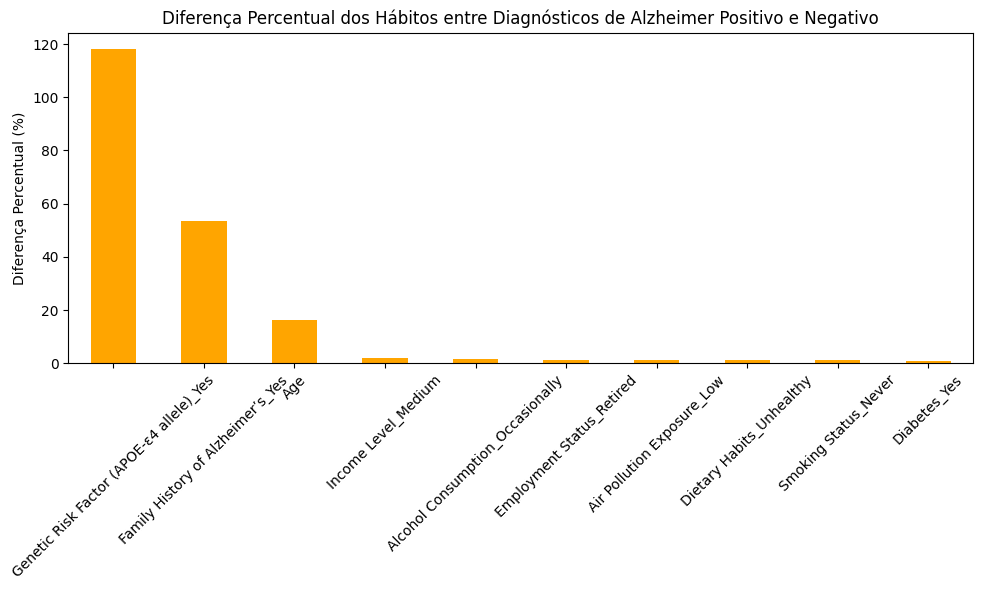

In [39]:
top_features = diff_percentage.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='orange')
plt.title('Diferença Percentual dos Hábitos entre Diagnósticos de Alzheimer Positivo e Negativo')
plt.ylabel('Diferença Percentual (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:

X = df.drop(columns=['Alzheimer’s Diagnosis'])
y = df['Alzheimer’s Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
result_mlp = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances_mlp = result_mlp.importances_mean

In [42]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
importances_tree = tree.feature_importances_

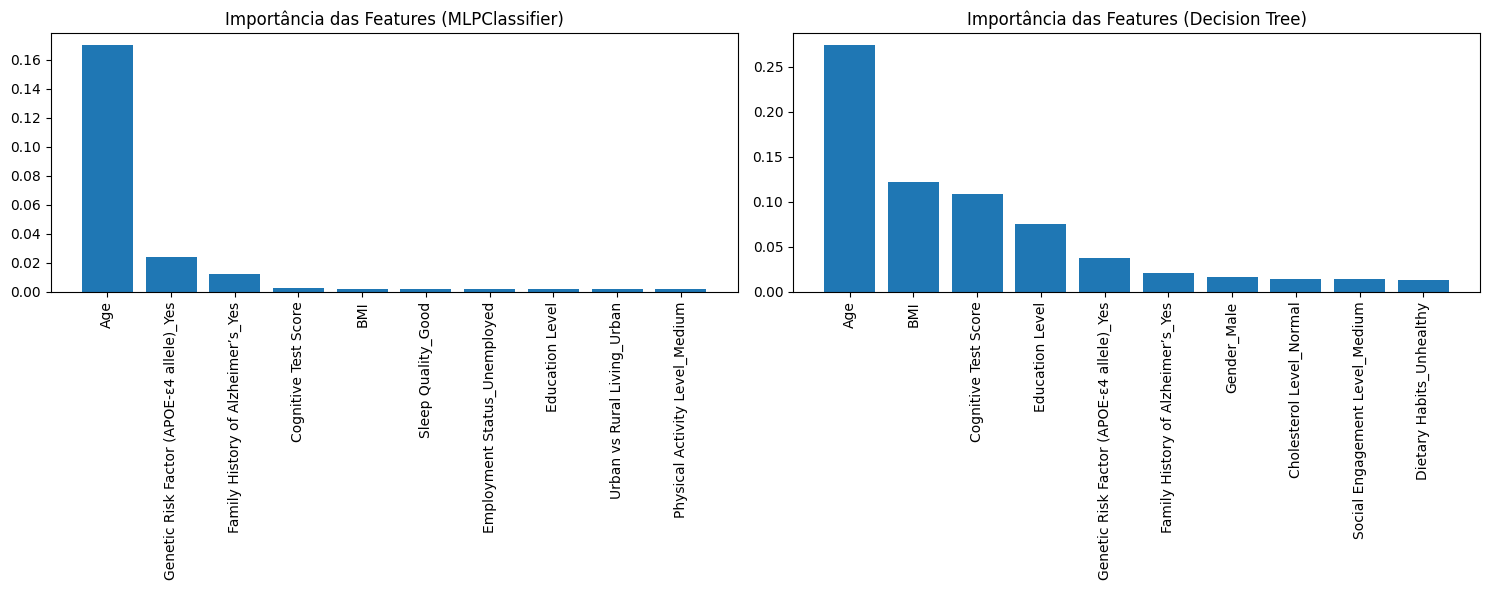

In [43]:
indices_mlp = np.argsort(importances_mlp)[::-1]
indices_tree = np.argsort(importances_tree)[::-1]

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title("Importância das Features (MLPClassifier)")
plt.bar(range(10), importances_mlp[indices_mlp][:10])
plt.xticks(range(10), X.columns[indices_mlp][:10], rotation=90)

plt.subplot(1, 2, 2)
plt.title("Importância das Features (Decision Tree)")
plt.bar(range(10), importances_tree[indices_tree][:10])
plt.xticks(range(10), X.columns[indices_tree][:10], rotation=90)

plt.tight_layout()
plt.show()